In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
categorical_features=[features for features in train.columns 
                      if train[features].dtypes=='O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
numerical_features=[features for features in train.columns 
                    if train[features].dtypes!='O']
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

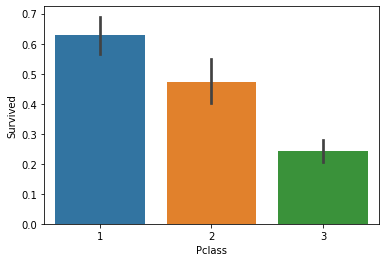

In [11]:
sns.barplot(x="Pclass",y="Survived",data=train);

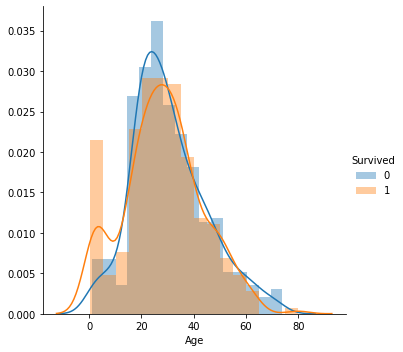

In [12]:
sns.FacetGrid(train, hue="Survived", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

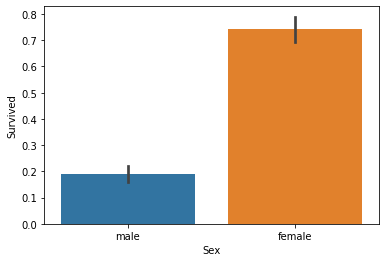

In [13]:
sns.barplot(x="Sex",y="Survived",data=train);

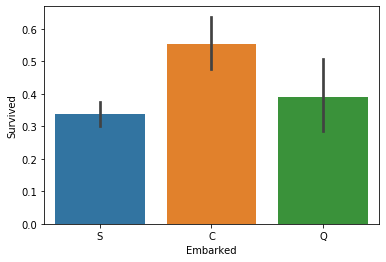

In [14]:
sns.barplot(x="Embarked",y="Survived",data=train);

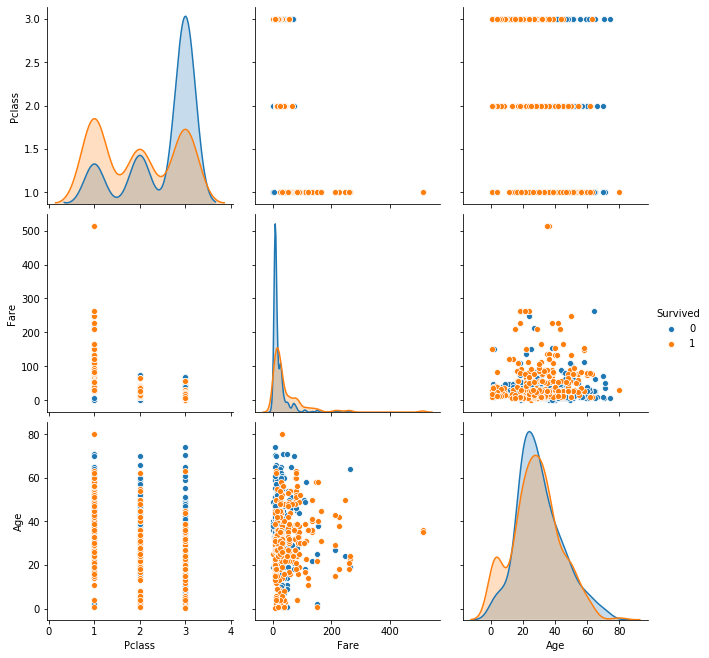

In [15]:
sns.pairplot(train[["Survived","Pclass","Fare","Age"]], 
             hue="Survived", height=3);
plt.show()

In [16]:
y_train= train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [18]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 11)


In [19]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
age_by_pclass_sex =all_data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'
              .format(pclass, sex, age_by_pclass_sex[sex][pclass]))
        
print('Median age of all passengers: {}'.format(all_data['Age'].median()))


Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [21]:
all_data['Age']= all_data.groupby(['Sex','Pclass'])['Age']\
    .apply(lambda x:x.fillna(x.median()))
    
all_data['Age'].isnull().sum()

0

In [22]:
mode=all_data['Embarked'].mode()
all_data['Embarked']= all_data['Embarked'].fillna('mode')

In [23]:
med_fare= all_data.groupby(['Pclass','Parch','SibSp'])\
    .Fare.median()[3][0][0]
med_fare

7.8542

In [24]:
all_data['Fare'] = all_data['Fare'].fillna(med_fare)

In [25]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [26]:
all_data['Family_size']= all_data['SibSp']+all_data['Parch']+1

In [27]:
all_data['Title'] = all_data['Name']\
    .str.split(', ', expand=True)[1]\
    .str.split('.', expand=True)[0]
all_data['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [28]:
all_data['FarePerPerson'] = all_data['Fare']/all_data['Family_size']
all_data['FarePerPerson']

0         3.625000
1        35.641650
2         7.925000
3        26.550000
4         8.050000
           ...    
1304      8.050000
1305    108.900000
1306      7.250000
1307      8.050000
1308      7.452767
Name: FarePerPerson, Length: 1309, dtype: float64

In [29]:
all_data.drop(['Ticket','SibSp','Name','Parch','Cabin'],axis=1,inplace=True)

In [30]:
all_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size,Title,FarePerPerson
0,1,3,male,22.0,7.2500,S,2,Mr,3.62500
1,2,1,female,38.0,71.2833,C,2,Mrs,35.64165
2,3,3,female,26.0,7.9250,S,1,Miss,7.92500
3,4,1,female,35.0,53.1000,S,2,Mrs,26.55000
4,5,3,male,35.0,8.0500,S,1,Mr,8.05000


In [31]:
all_data=all_data.drop(['Fare'],axis=1)

In [32]:
categorical_features=[features for features in all_data.columns 
                      if all_data[features].dtypes=='O']
categorical_features

['Sex', 'Embarked', 'Title']

In [33]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
lbl= LabelEncoder()
lbl.fit(list(all_data['Title'].values)) 
all_data['Title'] = lbl.transform(list(all_data['Title'].values))

In [34]:
lbl.fit(list(all_data['Sex'].values)) 
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

In [35]:
lbl.fit(list(all_data['Embarked'].values)) 
all_data['Embarked'] = lbl.transform(list(all_data['Embarked'].values))

In [36]:
all_data.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,1,22.0,2,2,12,3.62500
1,2,1,0,38.0,0,2,13,35.64165
2,3,3,0,26.0,2,1,9,7.92500
3,4,1,0,35.0,2,2,13,26.55000
4,5,3,1,35.0,2,1,12,8.05000


In [37]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [38]:
train.corr()

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
PassengerId,1.000000,-0.035144,0.042939,0.038742,0.013083,-0.040143,0.033879,0.026303
Pclass,-0.035144,1.000000,0.131900,-0.417667,0.157112,0.065997,0.032520,-0.485079
Sex,0.042939,0.131900,1.000000,0.101354,0.104057,-0.200988,0.245085,-0.115143
Age,0.038742,-0.417667,0.101354,1.000000,-0.005409,-0.258986,0.287455,0.180237
Embarked,0.013083,0.157112,0.104057,-0.005409,1.000000,0.064701,0.072720,-0.228555
Family_size,-0.040143,0.065997,-0.200988,-0.258986,0.064701,1.000000,-0.196715,-0.099173
Title,0.033879,0.032520,0.245085,0.287455,0.072720,-0.196715,1.000000,-0.051322
FarePerPerson,0.026303,-0.485079,-0.115143,0.180237,-0.228555,-0.099173,-0.051322,1.000000


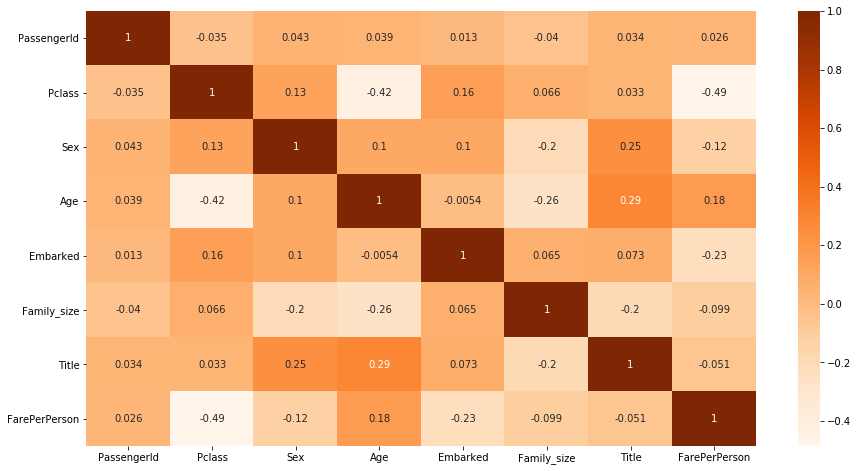

In [39]:
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='Oranges');

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [41]:
X = train
X

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,1,22.0,2,2,12,3.62500
1,2,1,0,38.0,0,2,13,35.64165
2,3,3,0,26.0,2,1,9,7.92500
3,4,1,0,35.0,2,2,13,26.55000
4,5,3,1,35.0,2,1,12,8.05000
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,2,1,15,13.00000
887,888,1,0,19.0,2,1,9,30.00000
888,889,3,0,22.0,2,4,9,5.86250
889,890,1,1,26.0,0,1,12,30.00000


In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [70, 90, 110], 'loss': ['deviance', 'exponential'],
     'criterion': ['friedman_mse','mse','mae'], 'max_depth': [3, 4, 5]},
  ]
GBR = GradientBoostingClassifier(random_state=42)

grid_searchGBR = GridSearchCV(GBR, param_grid, cv=5,
                           return_train_score=True)
grid_searchGBR.fit(X, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [45]:
finalMdG = grid_searchGBR.predict(test)
finalMdG

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
ID = test['PassengerId']

In [48]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = finalMdG
submission.to_csv('submissiongb.csv',index=False)

In [46]:
param_grid = [
    {'n_estimators': [70, 90, 110], 'criterion': ['gini', 'entropy'],
     'max_features': ['auto','sqrt','log2'], 'bootstrap': [True, False]},
  ]
RFC = RandomForestClassifier(random_state=42)

grid_searchRFC = GridSearchCV(RFC, param_grid, cv=5,
                           return_train_score=True)
grid_searchRFC.fit(X, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [50]:
finalMdR = grid_searchRFC.predict(test)
finalMdR

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = finalMdR
submission.to_csv('submissionrd.csv',index=False)

In [83]:
from sklearn.neural_network import MLPClassifier
param_grid = [
    {'activation': ['identity', 'logistic', 'tanh', 'relu'],
     'solver': ['lbfgs', 'sgd', 'adam'],
     'learning_rate': ['constant', 'invscaling', 'adaptive']
    }]

MLP = MLPClassifier(random_state=42)

grid_searchMLP = GridSearchCV(MLP, param_grid, cv=5,
                           return_train_score=True)
grid_searchMLP.fit(X, y_train)

/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/n

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...e=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activat

In [84]:
grid_searchMLP.best_score_

0.7532295524449187

In [85]:
finalMLP = grid_searchMLP.predict(test)
finalMLP

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [112]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = pd.Series(arr)
submission.to_csv('submissionRnd.csv',index=False)

In [136]:
R3 = ((finalMdR + finalMdG + finalMLP)/3)

In [137]:
unique, counts = np.unique(R3, return_counts=True)
dict(zip(unique, counts))

{0.0: 253, 0.3333333333333333: 37, 0.6666666666666666: 56, 1.0: 72}

In [135]:
unique, counts = np.unique(np.rint(R3).astype(int), return_counts=True)
dict(zip(unique, counts))

{0: 290, 1: 128}

In [91]:
unique, counts = np.unique(R2, return_counts=True)
dict(zip(unique, counts))

{0.0: 267, 0.5: 27, 1.0: 124}

In [138]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = R3

In [139]:
submission['Survived'].value_counts()

0.000000    253
1.000000     72
0.666667     56
0.333333     37
Name: Survived, dtype: int64

In [99]:
submission['Survived'] = submission['Survived'].replace([2/3,1/3],2)
submission['Survived'].value_counts()

0.0    253
2.0     93
1.0     72
Name: Survived, dtype: int64

In [101]:
submission['Survived'] = submission['Survived'].astype(int)

In [102]:
submission.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,2


In [141]:
arr = []
np.random.seed(None)
for n in submission['Survived']:
    if n == 0 or n == 1:
        arr.append(n)
    else:
        r = np.random.random()
        if(r<0.5):
            arr.append(0)
        else:
            arr.append(1)
unique, counts = np.unique(arr, return_counts=True)
dict(zip(unique, counts))

{0.0: 304, 1.0: 114}

In [144]:
Rd = np.asarray(arr).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [145]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = Rd
submission.to_csv('submissionRnd2.csv',index=False)